In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Pune_house_data.csv')

In [3]:
df.head(5)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [4]:
df.size

119880

In [5]:
df.shape

(13320, 9)

In [6]:
df.info

<bound method DataFrame.info of                   area_type   availability       size  society total_sqft  \
0      Super built-up  Area         19-Dec      2 BHK  Coomee        1056   
1                Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   
2            Built-up  Area  Ready To Move      3 BHK      NaN       1440   
3      Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   
4      Super built-up  Area  Ready To Move      2 BHK      NaN       1200   
...                     ...            ...        ...      ...        ...   
13315        Built-up  Area  Ready To Move  5 Bedroom  ArsiaEx       3453   
13316  Super built-up  Area  Ready To Move      4 BHK      NaN       3600   
13317        Built-up  Area  Ready To Move      2 BHK  Mahla T       1141   
13318  Super built-up  Area         18-Jun      4 BHK  SollyCl       4689   
13319  Super built-up  Area  Ready To Move      1 BHK      NaN        550   

       bath  balcony   price         site_l

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [10]:
df.nunique()

area_type           4
availability       81
size               31
society          2688
total_sqft       2117
bath               19
balcony             4
price            1994
site_location      97
dtype: int64

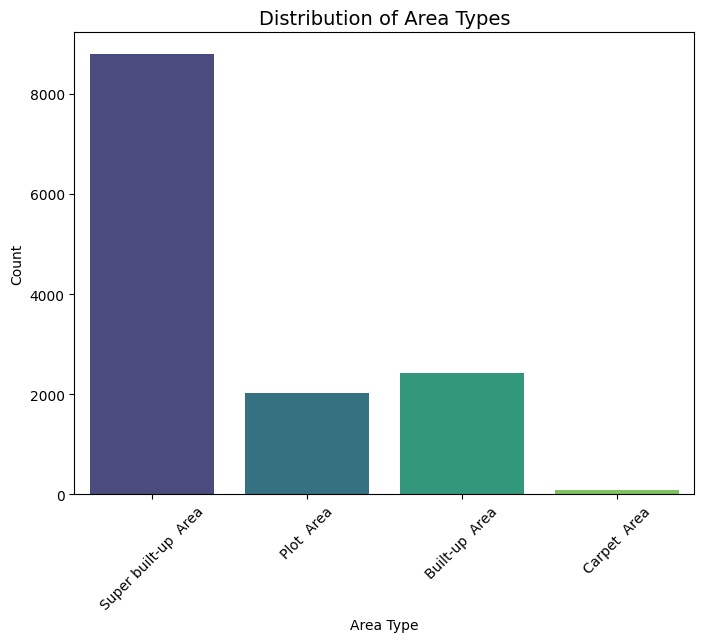

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='area_type', palette='viridis')
plt.title('Distribution of Area Types', fontsize=14)
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

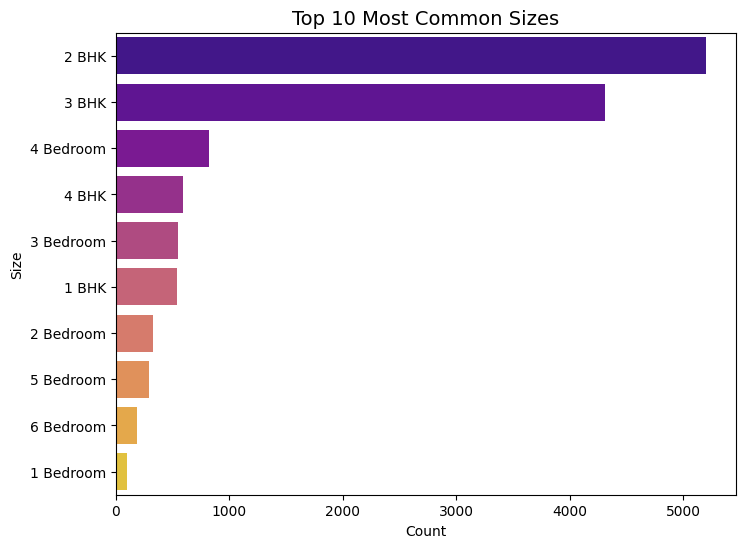

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='size', order=df['size'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Most Common Sizes', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Size')
plt.show()

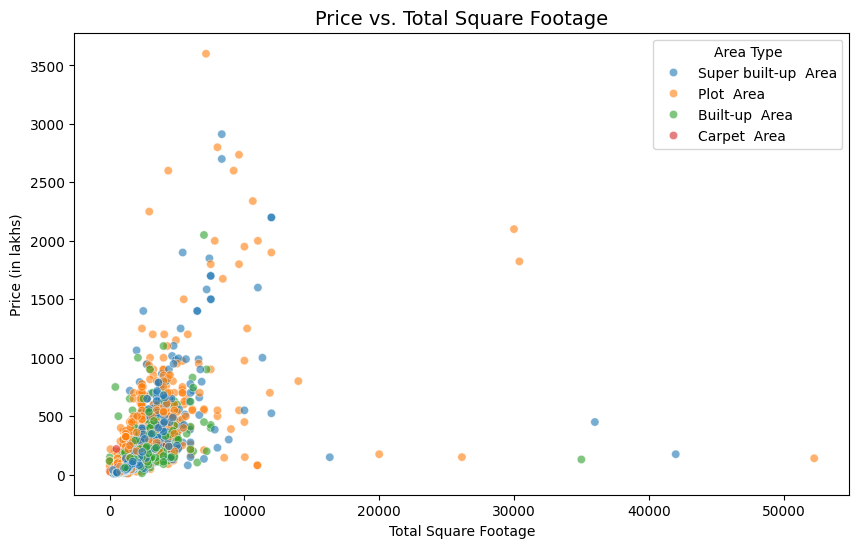

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=pd.to_numeric(df['total_sqft'], errors='coerce'), y='price', hue='area_type', palette='tab10', alpha=0.6)
plt.title('Price vs. Total Square Footage', fontsize=14)
plt.xlabel('Total Square Footage')
plt.ylabel('Price (in lakhs)')
plt.legend(title='Area Type')
plt.show()

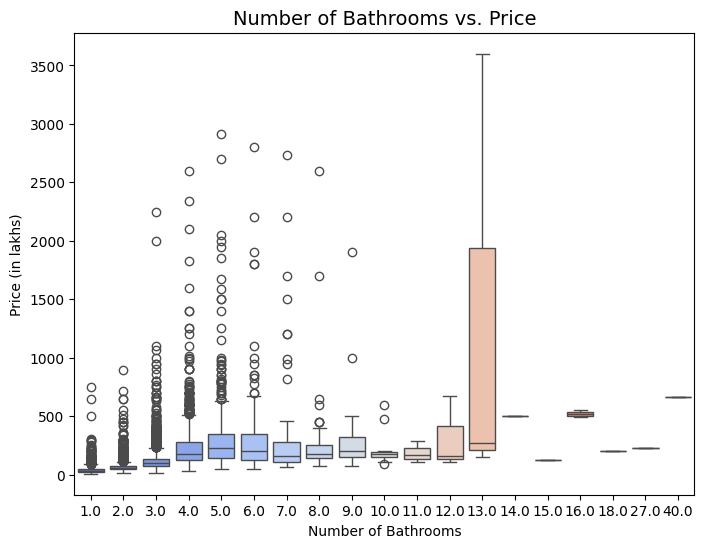

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bath', y='price', palette='coolwarm')
plt.title('Number of Bathrooms vs. Price', fontsize=14)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

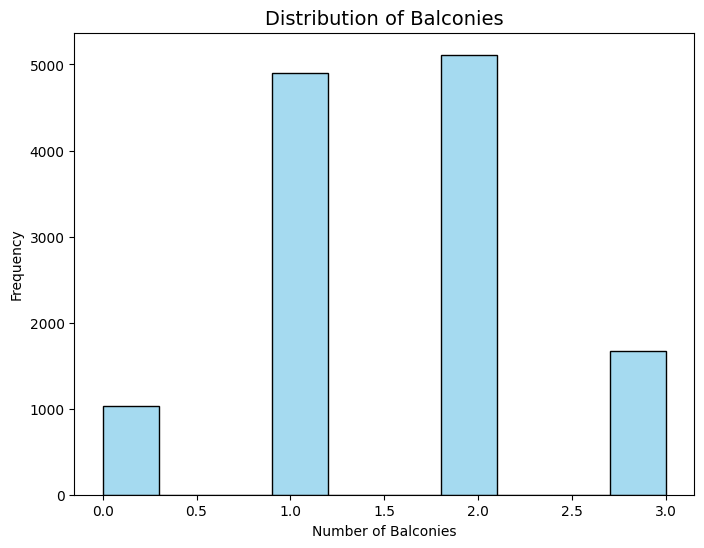

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['balcony'].dropna(), bins=10, kde=False, color='skyblue')
plt.title('Distribution of Balconies', fontsize=14)
plt.xlabel('Number of Balconies')
plt.ylabel('Frequency')
plt.show()

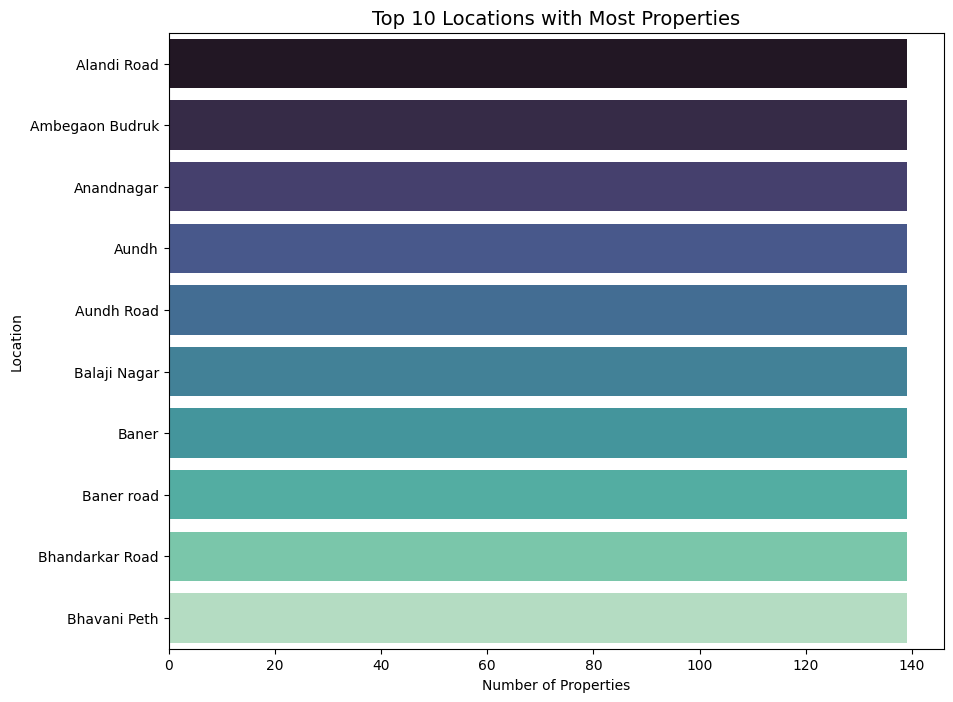

In [16]:
plt.figure(figsize=(10, 8))
top_locations = df['site_location'].value_counts().head(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='mako')
plt.title('Top 10 Locations with Most Properties', fontsize=14)
plt.xlabel('Number of Properties')
plt.ylabel('Location')
plt.show()

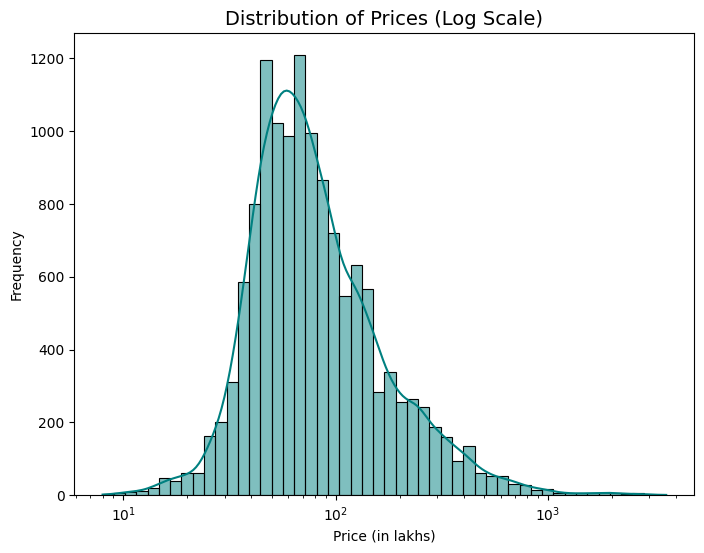

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True, color='teal', log_scale=True)
plt.title('Distribution of Prices (Log Scale)', fontsize=14)
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

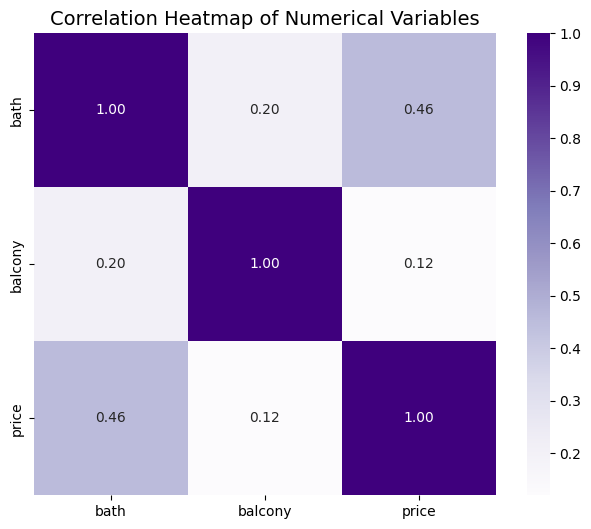

In [18]:
numerical_cols = ['bath', 'balcony', 'price']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

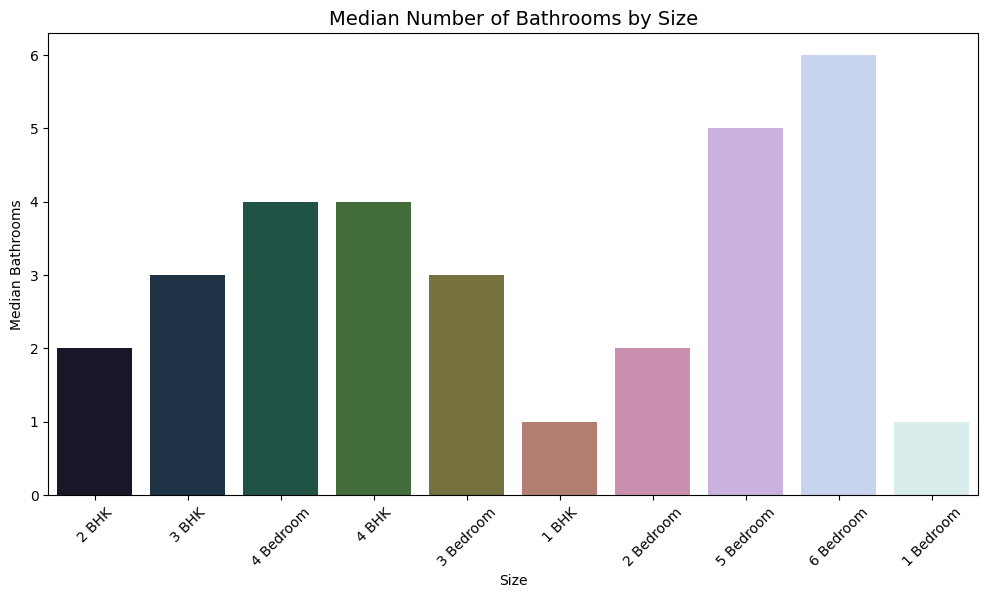

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='size', y='bath', estimator='median', ci=None, order=df['size'].value_counts().index[:10], palette='cubehelix')
plt.title('Median Number of Bathrooms by Size', fontsize=14)
plt.xlabel('Size')
plt.ylabel('Median Bathrooms')
plt.xticks(rotation=45)
plt.show()

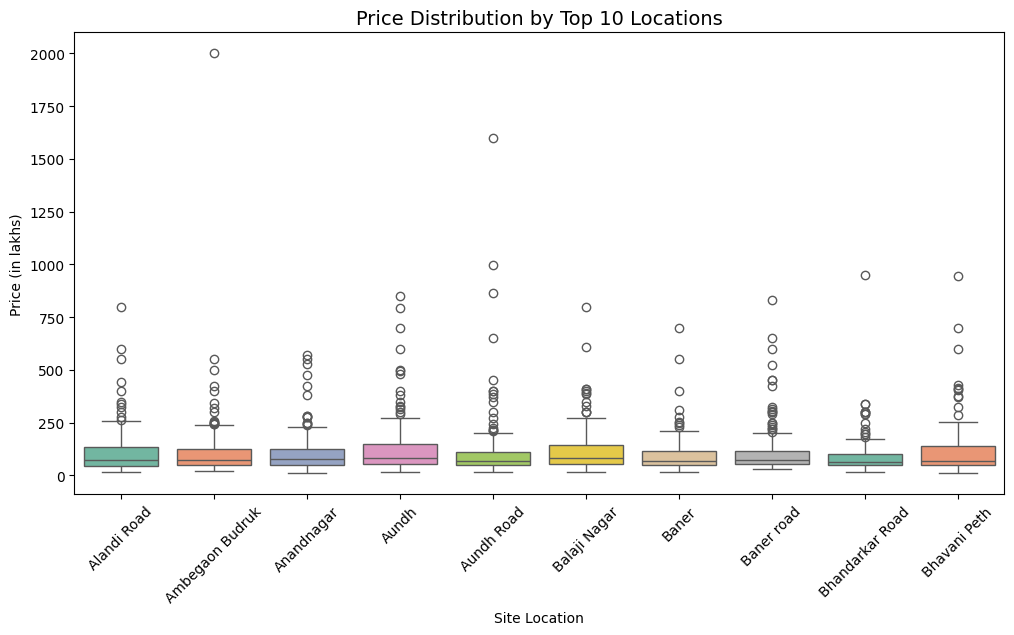

In [20]:
top_locations = df['site_location'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['site_location'].isin(top_locations)], x='site_location', y='price', palette='Set2')
plt.title('Price Distribution by Top 10 Locations', fontsize=14)
plt.xlabel('Site Location')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

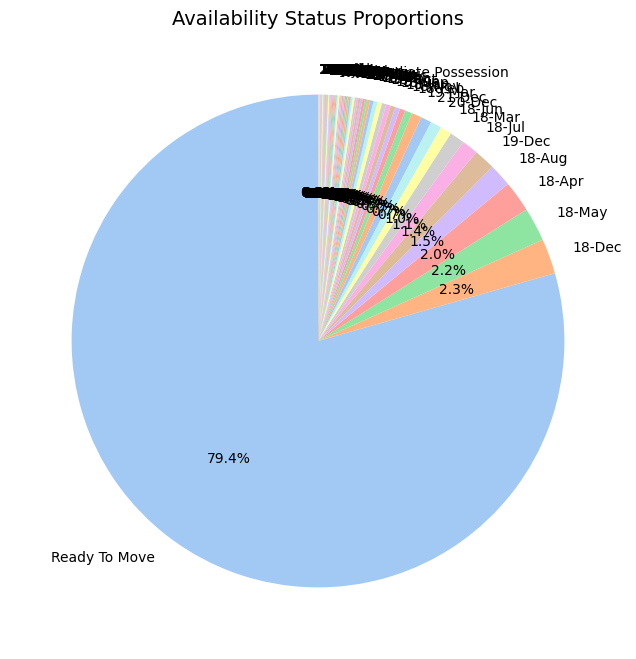

In [21]:
availability_counts = df['availability'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(availability_counts.values, labels=availability_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Availability Status Proportions', fontsize=14)
plt.show()

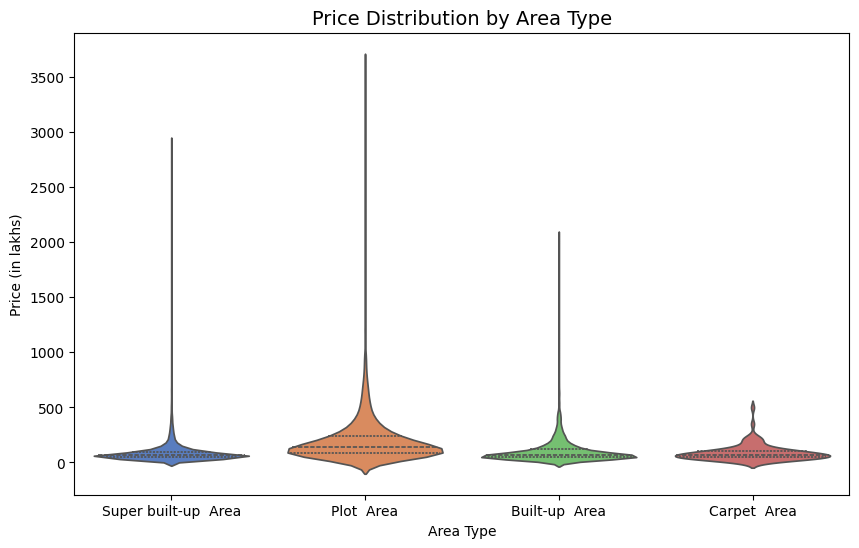

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='area_type', y='price', palette='muted', inner='quartile')
plt.title('Price Distribution by Area Type', fontsize=14)
plt.xlabel('Area Type')
plt.ylabel('Price (in lakhs)')
plt.show()

In [23]:
df = df.drop('society', axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [24]:
df['balcony'].fillna(df['balcony'].median(), inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)

df = df.dropna(subset=['site_location'])

In [25]:
df.isnull().sum()

area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      0
dtype: int64

In [26]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
30,Super built-up Area,19-Dec,4 BHK,2100 - 2850,4.0,0.0,186.000,Gultekdi
56,Built-up Area,20-Feb,4 Bedroom,3010 - 3410,NaN,NaN,192.000,Model colony
81,Built-up Area,18-Oct,4 Bedroom,2957 - 3450,NaN,NaN,224.500,Shukrawar Peth
122,Super built-up Area,18-Mar,4 BHK,3067 - 8156,4.0,0.0,477.000,Ganeshkhind
137,Super built-up Area,19-Mar,2 BHK,1042 - 1105,2.0,0.0,54.005,Khadaki
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,3 BHK,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar
13059,Super built-up Area,Ready To Move,2 BHK,1200 - 1470,2.0,0.0,72.760,Anandnagar
13240,Super built-up Area,Ready To Move,1 BHK,1020 - 1130,NaN,NaN,52.570,Vadgaon Budruk
13265,Super built-up Area,20-Sep,2 BHK,1133 - 1384,2.0,0.0,59.135,Dapodi


In [27]:

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft
0,Super built-up Area,19-Dec,2 BHK,2.0,1.0,39.07,Alandi Road,1056.0
1,Plot Area,Ready To Move,4 Bedroom,5.0,3.0,120.00,Ambegaon Budruk,2600.0
2,Built-up Area,Ready To Move,3 BHK,2.0,3.0,62.00,Anandnagar,1440.0
3,Super built-up Area,Ready To Move,3 BHK,3.0,1.0,95.00,Aundh,1521.0
4,Super built-up Area,Ready To Move,2 BHK,2.0,1.0,51.00,Aundh Road,1200.0


In [28]:
df['price_per_sqft'] = (df['price']*100000)/df['new_total_sqft']
df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2 BHK,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
1,Plot Area,Ready To Move,4 Bedroom,5.0,3.0,120.00,Ambegaon Budruk,2600.0,4615.384615
2,Built-up Area,Ready To Move,3 BHK,2.0,3.0,62.00,Anandnagar,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3 BHK,3.0,1.0,95.00,Aundh,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2 BHK,2.0,1.0,51.00,Aundh Road,1200.0,4250.000000


In [29]:
df.site_location = df.site_location.apply(lambda x: x.strip())

In [30]:
location_stats = df.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
print(len(location_stats[location_stats<=10]), len(df.site_location.unique()))

1 97


In [31]:
locations_less_than_10 = location_stats[location_stats<=10]

df.site_location = df.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df.site_location.unique())

97

In [32]:
df.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates = df.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates_not_ready = dates[dates<10000]
df.availability = df.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)
len(df.availability.unique())

2

In [33]:
df.isnull().sum()

area_type           0
availability        0
size               16
bath               73
balcony           609
price               0
site_location       0
new_total_sqft     46
price_per_sqft     46
dtype: int64

In [34]:
df['new_total_sqft'].fillna(df['new_total_sqft'].median(), inplace=True)
df['price_per_sqft'].fillna(df['price_per_sqft'].median(), inplace=True)

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13319, dtype: float64

In [35]:
df = pd.get_dummies(df, drop_first=True)

In [36]:
df.head()

,bath,balcony,price,new_total_sqft,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,size_1 Bedroom,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,2.0,1.0,39.07,1056.0,3699.810606,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,3.0,120.00,2600.0,4615.384615,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,62.00,1440.0,4305.555556,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1.0,95.00,1521.0,6245.890861,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,51.00,1200.0,4250.000000,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
from scipy.stats import zscore

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = df[numerical_columns].apply(zscore)
df = df[(np.abs(df) < 3).all(axis=1)]

print(f"Original number of rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df.shape[0]}")

Original number of rows: 0
Rows after outlier removal: 0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(['price'], axis=1)  # Drop the target column 'price'
y = df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [43]:
df = pd.read_csv("../data/Pune_house_data.csv")
df.shape


(13320, 9)

In [44]:
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [45]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='str')

In [46]:
df = df.drop(['society'], axis=1)
df.shape


(13320, 8)

In [47]:
df.isnull().sum()


area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [48]:
df = df.dropna()
df.shape


(12710, 8)

In [49]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)

df.head()
df.shape


(12710, 8)

In [50]:
def convert_sqft_to_num(x):
    try:
        if '-' in str(x):
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None


In [51]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [52]:
df = df.dropna()
df.shape


(12668, 8)

In [53]:
import numpy as np
import pandas as pd

# 1️⃣ Create price per sqft
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [54]:
location_stats = df.groupby('site_location')['site_location'].count()
location_stats_less_than_10 = location_stats[location_stats < 10]

df['site_location'] = df['site_location'].apply(
    lambda x: 'other' if x in location_stats_less_than_10 else x
)

In [55]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[
            (subdf['price_per_sqft'] > (m - st)) &
            (subdf['price_per_sqft'] <= (m + st))
        ]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)

In [56]:
df = df[~(df['total_sqft'] / df['bhk'] < 300)]

In [57]:
df = df.drop(['availability', 'price_per_sqft'], axis=1)

In [58]:
df = pd.get_dummies(df, drop_first=True)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.6124786007930463

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("../data/Pune_house_data.csv")

In [3]:
df = df.drop(['society'], axis=1)

In [4]:
df = df.dropna()

In [5]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)

In [6]:
def convert_sqft_to_num(x):
    try:
        if '-' in str(x):
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna()

In [7]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [8]:
location_stats = df.groupby('site_location')['site_location'].count()
location_stats_less_than_10 = location_stats[location_stats < 10]

df['site_location'] = df['site_location'].apply(
    lambda x: 'other' if x in location_stats_less_than_10 else x
)

In [9]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[
            (subdf['price_per_sqft'] > (m - st)) &
            (subdf['price_per_sqft'] <= (m + st))
        ]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)

df = df[~(df['total_sqft'] / df['bhk'] < 300)]

df = df.drop(['availability', 'price_per_sqft'], axis=1)

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.6850949932640074

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_model = grid.best_estimator_

best_model.score(X_test, y_test)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.7386990914062395


0.6886515895726013

In [14]:
from sklearn.metrics import mean_absolute_error

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mae


18.186507637160428

In [15]:
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

comparison.head(10)


,Actual Price,Predicted Price
0,59.0,59.713164
1,87.0,111.888641
2,125.0,139.806901
3,58.0,61.616783
4,57.0,52.378614
5,80.0,97.647857
6,75.0,65.909481
7,130.0,126.464043
8,95.0,77.920478
9,63.0,75.446752


In [16]:
def predict_price(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))
    
    # numeric features
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # location
    loc_col = "site_location_" + location
    if loc_col in X.columns:
        loc_index = np.where(X.columns == loc_col)[0][0]
        x[loc_index] = 1
    
    return best_model.predict([x])[0]


In [17]:
predict_price("Aundh", 1200, 2, 2)


c:\Users\vjykm\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(60.892428582276104)

In [18]:
predict_price("Alandi Road", 1200, 2, 2)
predict_price("Aundh Road", 1200, 2, 2)
predict_price("Ambegaon Budruk", 1200, 2, 2)


c:\Users\vjykm\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\vjykm\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\vjykm\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(55.679144863839014)

In [19]:
def predict_price(location, sqft, bath, bhk):
    x = pd.DataFrame(columns=X.columns)
    x.loc[0] = 0
    
    # numeric features
    x.loc[0, 'total_sqft'] = sqft
    x.loc[0, 'bath'] = bath
    x.loc[0, 'bhk'] = bhk
    
    # location one-hot
    loc_col = "site_location_" + location
    if loc_col in X.columns:
        x.loc[0, loc_col] = 1
    
    return best_model.predict(x)[0]


In [20]:
predict_price("Aundh", 1200, 2, 2)


np.float64(65.51765349552369)

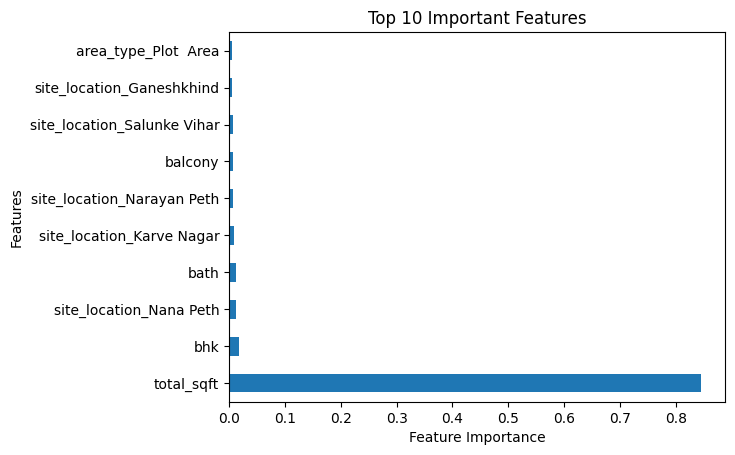

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.Series(best_model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

# Top 10 features
top10 = importance.head(10)

plt.figure()
top10.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()


In [22]:
def price_recommendation(listed_price, predicted_price):
    
    difference = listed_price - predicted_price
    percentage_diff = (difference / predicted_price) * 100
    
    if percentage_diff < -10:
        return "Underpriced"
    
    elif percentage_diff > 10:
        return "Overpriced"
    
    else:
        return "Fairly Priced"


In [23]:
predicted = 72
listed = 80

price_recommendation(listed, predicted)


'Overpriced'

In [24]:
pred = predict_price("Aundh", 1200, 2, 2)
listed_price = 75

price_recommendation(listed_price, pred)


'Overpriced'

In [26]:
import joblib

# Save trained model
joblib.dump(best_model, "pune_house_price_model.pkl")



['pune_house_price_model.pkl']

In [27]:

# Save feature column names
joblib.dump(X.columns, "model_columns.pkl")


['model_columns.pkl']

In [28]:
import os
os.listdir()


['model_columns.pkl', 'model_training.ipynb', 'pune_house_price_model.pkl']